<a href="https://colab.research.google.com/github/prathamnishad/Computer-Vision/blob/master/Kaggle_object_detection_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import re
import torch
import torchvision
from torchvision import transforms 
import numpy as np
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler
from matplotlib import pyplot as plt


In [2]:
model=torch.load("/content/drive/My Drive/models/objectDetection1.pt")

In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

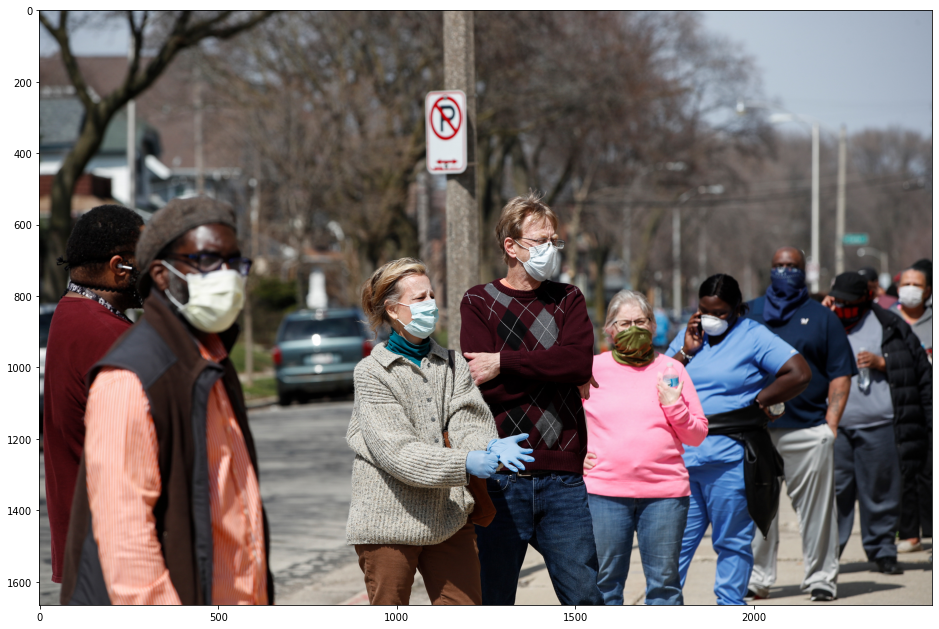

In [4]:
import matplotlib.patches as patches
image="/content/drive/My Drive/models/mask.jpg"
img=plt.imread(image)
fig,ax = plt.subplots(1,figsize=(16,16))
ax.imshow(img)
plt.show()

In [5]:
trans = transforms.Compose([transforms.ToTensor()])
image="/content/drive/My Drive/models/mask.jpg"
image = cv2.imread(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /= 255.0
image = trans(image)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
image=torch.reshape(image,(1,3,image.shape[1],image.shape[2]))
outputs = model(image.to(device))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [8]:
def format_prediction_string(boxes, scores,labels): 
    box=[]
    lab=[]
    for j in zip(scores,boxes,labels):
        box.append([j[1][0], j[1][1], j[1][2], j[1][3]])
        lab.append(j[2])
    return box,lab
detection_threshold=0.7
boxes = outputs[0]['boxes'].data.cpu().numpy()    ##Formate of the output's box is [Xmin,Ymin,Xmax,Ymax]
scores = outputs[0]['scores'].data.cpu().numpy()
labels = outputs[0]['labels'].data.cpu().numpy()

boxes = boxes[scores >= detection_threshold].astype(np.int32) #Compare the score of output with the threshold and
labels = labels[scores >= detection_threshold].astype(np.int32)
scores = scores[scores >= detection_threshold]                 


boxes[:, 2] = boxes[:, 2] - boxes[:, 0]         
boxes[:, 3] = boxes[:, 3] - boxes[:, 1]         #Convert the box formate to [Xmin,Ymin,W,H]


b,l=format_prediction_string(boxes, scores,labels)    
result = {                
    'boxes':b,
    'labels':l
}


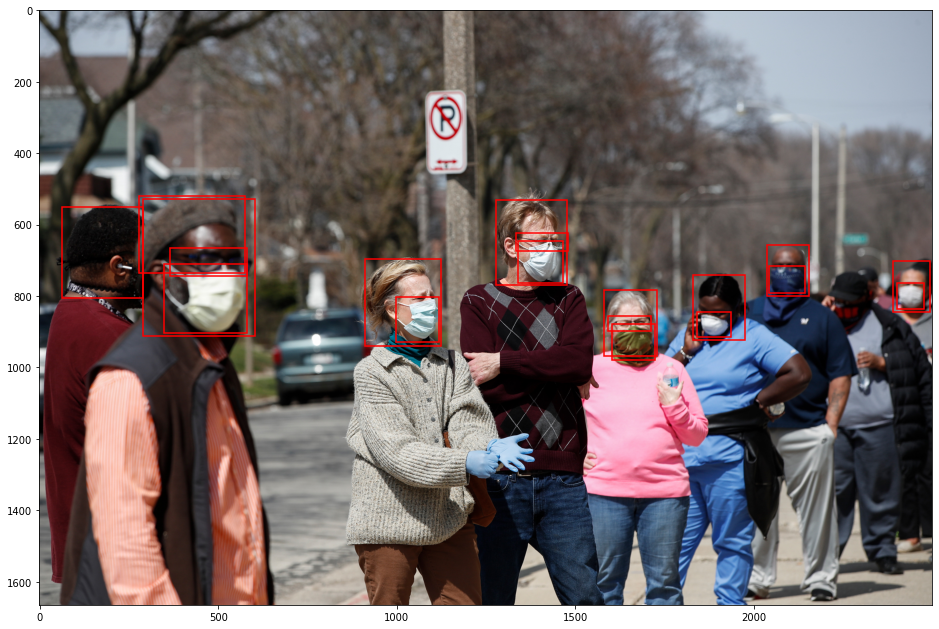

In [9]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
image="/content/drive/My Drive/models/mask.jpg"

img=plt.imread(image)

fig,ax = plt.subplots(1,figsize=(16,16))
ax.imshow(img)
boxes=result["boxes"]
for box in boxes:
    rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1.5,edgecolor='r',facecolor="none")
    ax.add_patch(rect)
plt.show()

In [ ]:
# def format_prediction_string(boxes, scores,labels): 
#     box=[]
#     lab=[]
#     for j in zip(scores,boxes,labels):
#         box.append([j[1][0], j[1][1], j[1][2], j[1][3]])
#         lab.append(j[2])
#     return box,lab

In [ ]:
# ## Lets make the prediction
# results=[]
# model.eval()
# detection_threshold = 0.40

# for images, image_ids in test_data_loader:    

#     images = list(image.to(device) for image in images)
#     outputs = model(images)

#     for i, image in enumerate(images):

#         boxes = outputs[i]['boxes'].data.cpu().numpy()    ##Formate of the output's box is [Xmin,Ymin,Xmax,Ymax]
#         scores = outputs[i]['scores'].data.cpu().numpy()
#         labels = outputs[i]['labels'].data.cpu().numpy()
        
#         boxes = boxes[scores >= detection_threshold].astype(np.int32) #Compare the score of output with the threshold and
#         labels = labels[scores >= detection_threshold].astype(np.int32)
#         scores = scores[scores >= detection_threshold]                 

#         image_id = image_ids[i]
        
#         boxes[:, 2] = boxes[:, 2] - boxes[:, 0]         
#         boxes[:, 3] = boxes[:, 3] - boxes[:, 1]         #Convert the box formate to [Xmin,Ymin,W,H]
        
        
#         b,l=format_prediction_string(boxes, scores,labels)    
#         result = {                                     #Store the image id and boxes and scores in result dict.
#             'image_id': image_id,
# #             'PredictionString': format_prediction_string(boxes, scores,labels)
#             'boxes':b,
#             'labels':l
#         }

        
#         results.append(result)              #Append the result dict to Results list